# Demo 4-17 Fractal Dimension

Today we will learn about various versions of fractal dimension, in particular, scaling dimension and box-counting = (Minkowski-Bouligand) dimension. We have already seen that the scaling dimension of the Sierpinski triangle is 
$$\frac{\log 3}{\log 2}\approx 1.584$$

Now let's calculate it's box-counting dimension. 

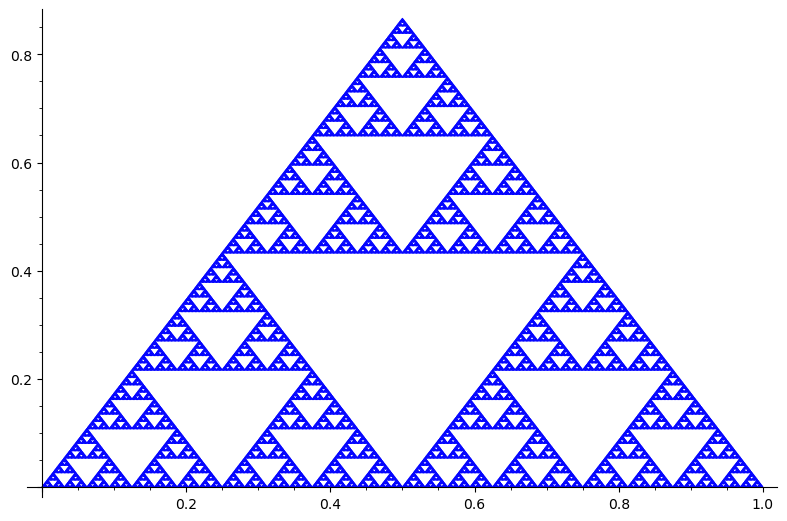

In [4]:
def sierpinski(level,side_length = 1, lower_left = (0,0)):
   """
   Returns a list of points in the Sierpinski triangle at the iteration level level, with a given side length.
   """
   if level == 1:
       c = lower_left #saves some space
       return [lower_left, (c[0] + side_length, c[1]), (c[0] + 0.5*side_length, c[1]  + n(sin(pi/3))*side_length) ] # Just returns the vertices of the triangle
   else:
       out = []
       out += sierpinski(level-1, side_length*0.5, lower_left)
       out += sierpinski(level-1, side_length*0.5, (lower_left[0] + 0.5*side_length, lower_left[1]))
       out += sierpinski(level-1, side_length*0.5, (lower_left[0] + 0.25*side_length,lower_left[1] + n(sin(pi/3))*side_length*0.5 ))
       return(out)

list_plot(sierpinski(10), size = 1, figsize = 8)

Now we want to calculate its box_counting dimension. Given some side length for our boxes, we want to figure out how many boxes contain a point in the Sierpinski triangle. 

The basic procedure is to create an array corresponding to the boxes and then iterate over a given list, and set the corresponding value in the array to 1 if that point is in the box. After we iterate over the list we will have our result - our array will have a 1 where that box contains a point, and a 0 if it doesn't. 

In [5]:
def box_array(level, points, xmin = 0, xmax = 1, ymin = 0, ymax = 1):
    """
    Returns a 2^level by 2^level array of 0s or 1s, 
    with a 1 in box (i,j) if there is a point in the box (i,j). Note that this could be done way more efficiently by storing the columns or rows as binary numbers. 
    """
    width = xmax - xmin
    height = ymax - ymin
    array = [[0 for j in range(2^level)] for i in range(2^level)]
    for p in points:
        px = (p[0] - xmin)/width -1/(2^(level + 2)) # rescale to within [0,1]
        py = (p[1] - ymin)/height -1/(2^(level + 2))
        i = int(px*2^level)
        j = int(py*2^level)
        array[i][j] = 1
    return(array)

S = sierpinski(10)
box_array(4, S)
        

[[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0],
 [1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0],
 [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

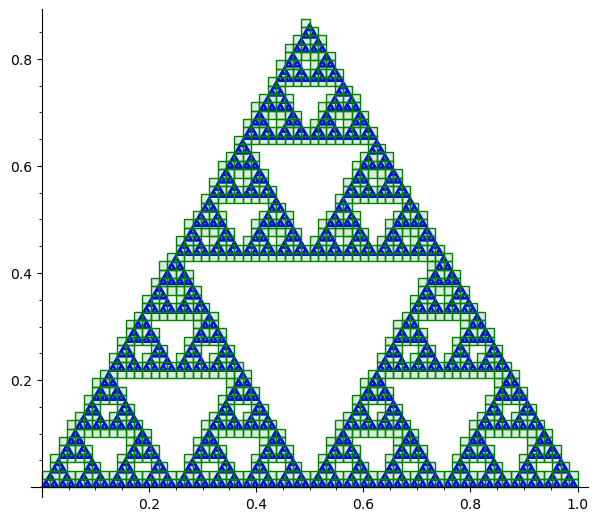

In [9]:
def box_array_plot(b_array, xmin = 0, xmax = 1, ymin = 0, ymax = 1, color = 'green'):
    width = xmax - xmin
    height = ymax - ymin
    num_width = len(b_array[0])
    level = log(num_width,2)
    lower_lefts = [(xmin + i*width/(num_width), ymin + j*height/(num_width)) for j in range(2^level) for i in range(2^level) if b_array[i][j] == 1]
    δx = width/num_width
    δy = height/(num_width)
    corners = lambda x,y : [(x,y), (x + δx, y), (x + δx, y + δy), (x, y + δy)]
    rect = lambda lx, ly : polygon( corners(lx,ly), color = color, alpha = 0.15) + polygon(corners(lx,ly), color = color, fill = False)
    return(sum(rect(lx, ly) for (lx,ly) in lower_lefts))
show(box_array_plot(box_array(6,sierpinski(10))) + list_plot(sierpinski(10), size = 1), figsize = 8 )

Log-log plot with 

$$x = log(1/\epsilon)$$
$$ y = log(N(\epsilon))$$ where $\epsilon$ is the size of the box

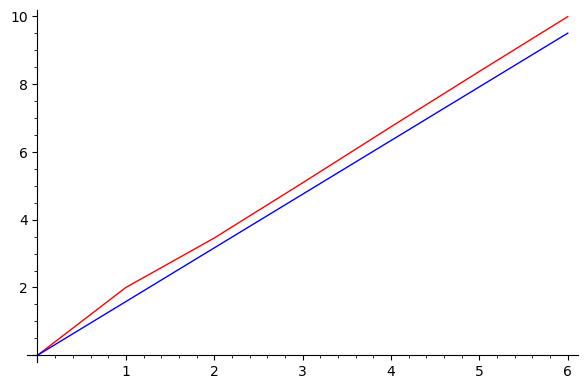

In [16]:
def number_of_ones(array):
    return(sum(sum(a) for a in array))

points = []

S = sierpinski(10)

for i in range(7):
    x = i
    y = n(log(number_of_ones(box_array(i, S)), 2))
    points.append((x,y))

t = var('t')
list_plot(points, plotjoined = True, color = 'red') + plot(1.584*t, (t,0,6))